
---

# ADL HW3 - Pretrained Models

In this assignment, you will analyze and compare a few pre-trained models from the field of computer vision.

The assignment is divided into several tasks:

- **EX1 - The Imagenette Dataset (10 pts)**  
- **EX2 - Pretrained Models (20 pts)**  
- **EX3 - Visualizing Feature Maps (30 pts)**  
- **EX4 - K-Nearest Neighbors (KNN) in the Embedding Space (50 pts)**  

Note: In this assignment, you will not train any models or aim to reach specific accuracy levels. Instead, you will investigate the behavior of a few pre-trained models.

---

## Grading

The grading for each section is indicated in the title. Grading will be based on the following criteria:

- **Following Instructions**  
- **Presentation**: Clear figures (with labels, titles, etc.), well-written discussions and comments, organized notebook, no leftover debugging prints, and no redundant functions.  
- **Clear and Efficient Code**: Your code should be clear and neat. Write clear comments and avoid `for loops` when vectorized operations are available. Use the GPU when possible.  
- **Discussion**: Ensure you write a discussion whenever it is required.  

---

## Submission Date: **31.01.2025**

Submit the fully executed notebook.

---


In [1]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# EX1 - Imagenette Dataset (10pts)



1.   Download the ```Imagenette``` dataset from ```torchvision``` ([link](https://pytorch.org/vision/0.19/generated/torchvision.datasets.Imagenette.html#torchvision.datasets.Imagenette)). Make sure the set size="160px" to avoid long downloading time.
2. Preprocess the data - resize to 256x256 and take a central crop of size 224. ToTensor, Normalize and so on.
3. Describe the dataset: number of samples for each set, classes labels, classes labels distribtuion (are they balanced?)

4. Plot 5 random samples from each class a present them in a ```num_classes X 5``` (rows X columns) grid.






In [2]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = datasets.Imagenette(root='./data', split='train', size='160px', transform=transform, download=True)
val_dataset = datasets.Imagenette(root='./data', split='val', size='160px', transform=transform, download=False)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0)

100%|██████████| 99.0M/99.0M [00:02<00:00, 43.3MB/s]


Extracting ./data/imagenette2-160.tgz to ./data


In [3]:
class_names = train_dataset.classes

train_labels = [label for _, label in train_dataset]
val_labels = [label for _, label in val_dataset]

train_counts = Counter(train_labels)
val_counts = Counter(val_labels)

print(f"Train samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Class names: {class_names}")
print("Training set distribution:", train_counts)
print("Validation set distribution:", val_counts)

train_min, train_max = min(train_counts.values()), max(train_counts.values())
val_min, val_max = min(val_counts.values()), max(val_counts.values())
print(f"Train counts range: {train_min}-{train_max}")
print(f"Validation counts range: {val_min}-{val_max}")
print("Classes are balanced." if (train_max - train_min) < 100 else "Classes are imbalanced.")

Train samples: 9469
Validation samples: 3925
Class names: [('tench', 'Tinca tinca'), ('English springer', 'English springer spaniel'), ('cassette player',), ('chain saw', 'chainsaw'), ('church', 'church building'), ('French horn', 'horn'), ('garbage truck', 'dustcart'), ('gas pump', 'gasoline pump', 'petrol pump', 'island dispenser'), ('golf ball',), ('parachute', 'chute')]
Training set distribution: Counter({2: 993, 0: 963, 6: 961, 9: 960, 5: 956, 1: 955, 8: 951, 4: 941, 7: 931, 3: 858})
Validation set distribution: Counter({7: 419, 4: 409, 8: 399, 1: 395, 5: 394, 9: 390, 6: 389, 0: 387, 3: 386, 2: 357})
Train counts range: 858-993
Validation counts range: 357-419
Classes are imbalanced.


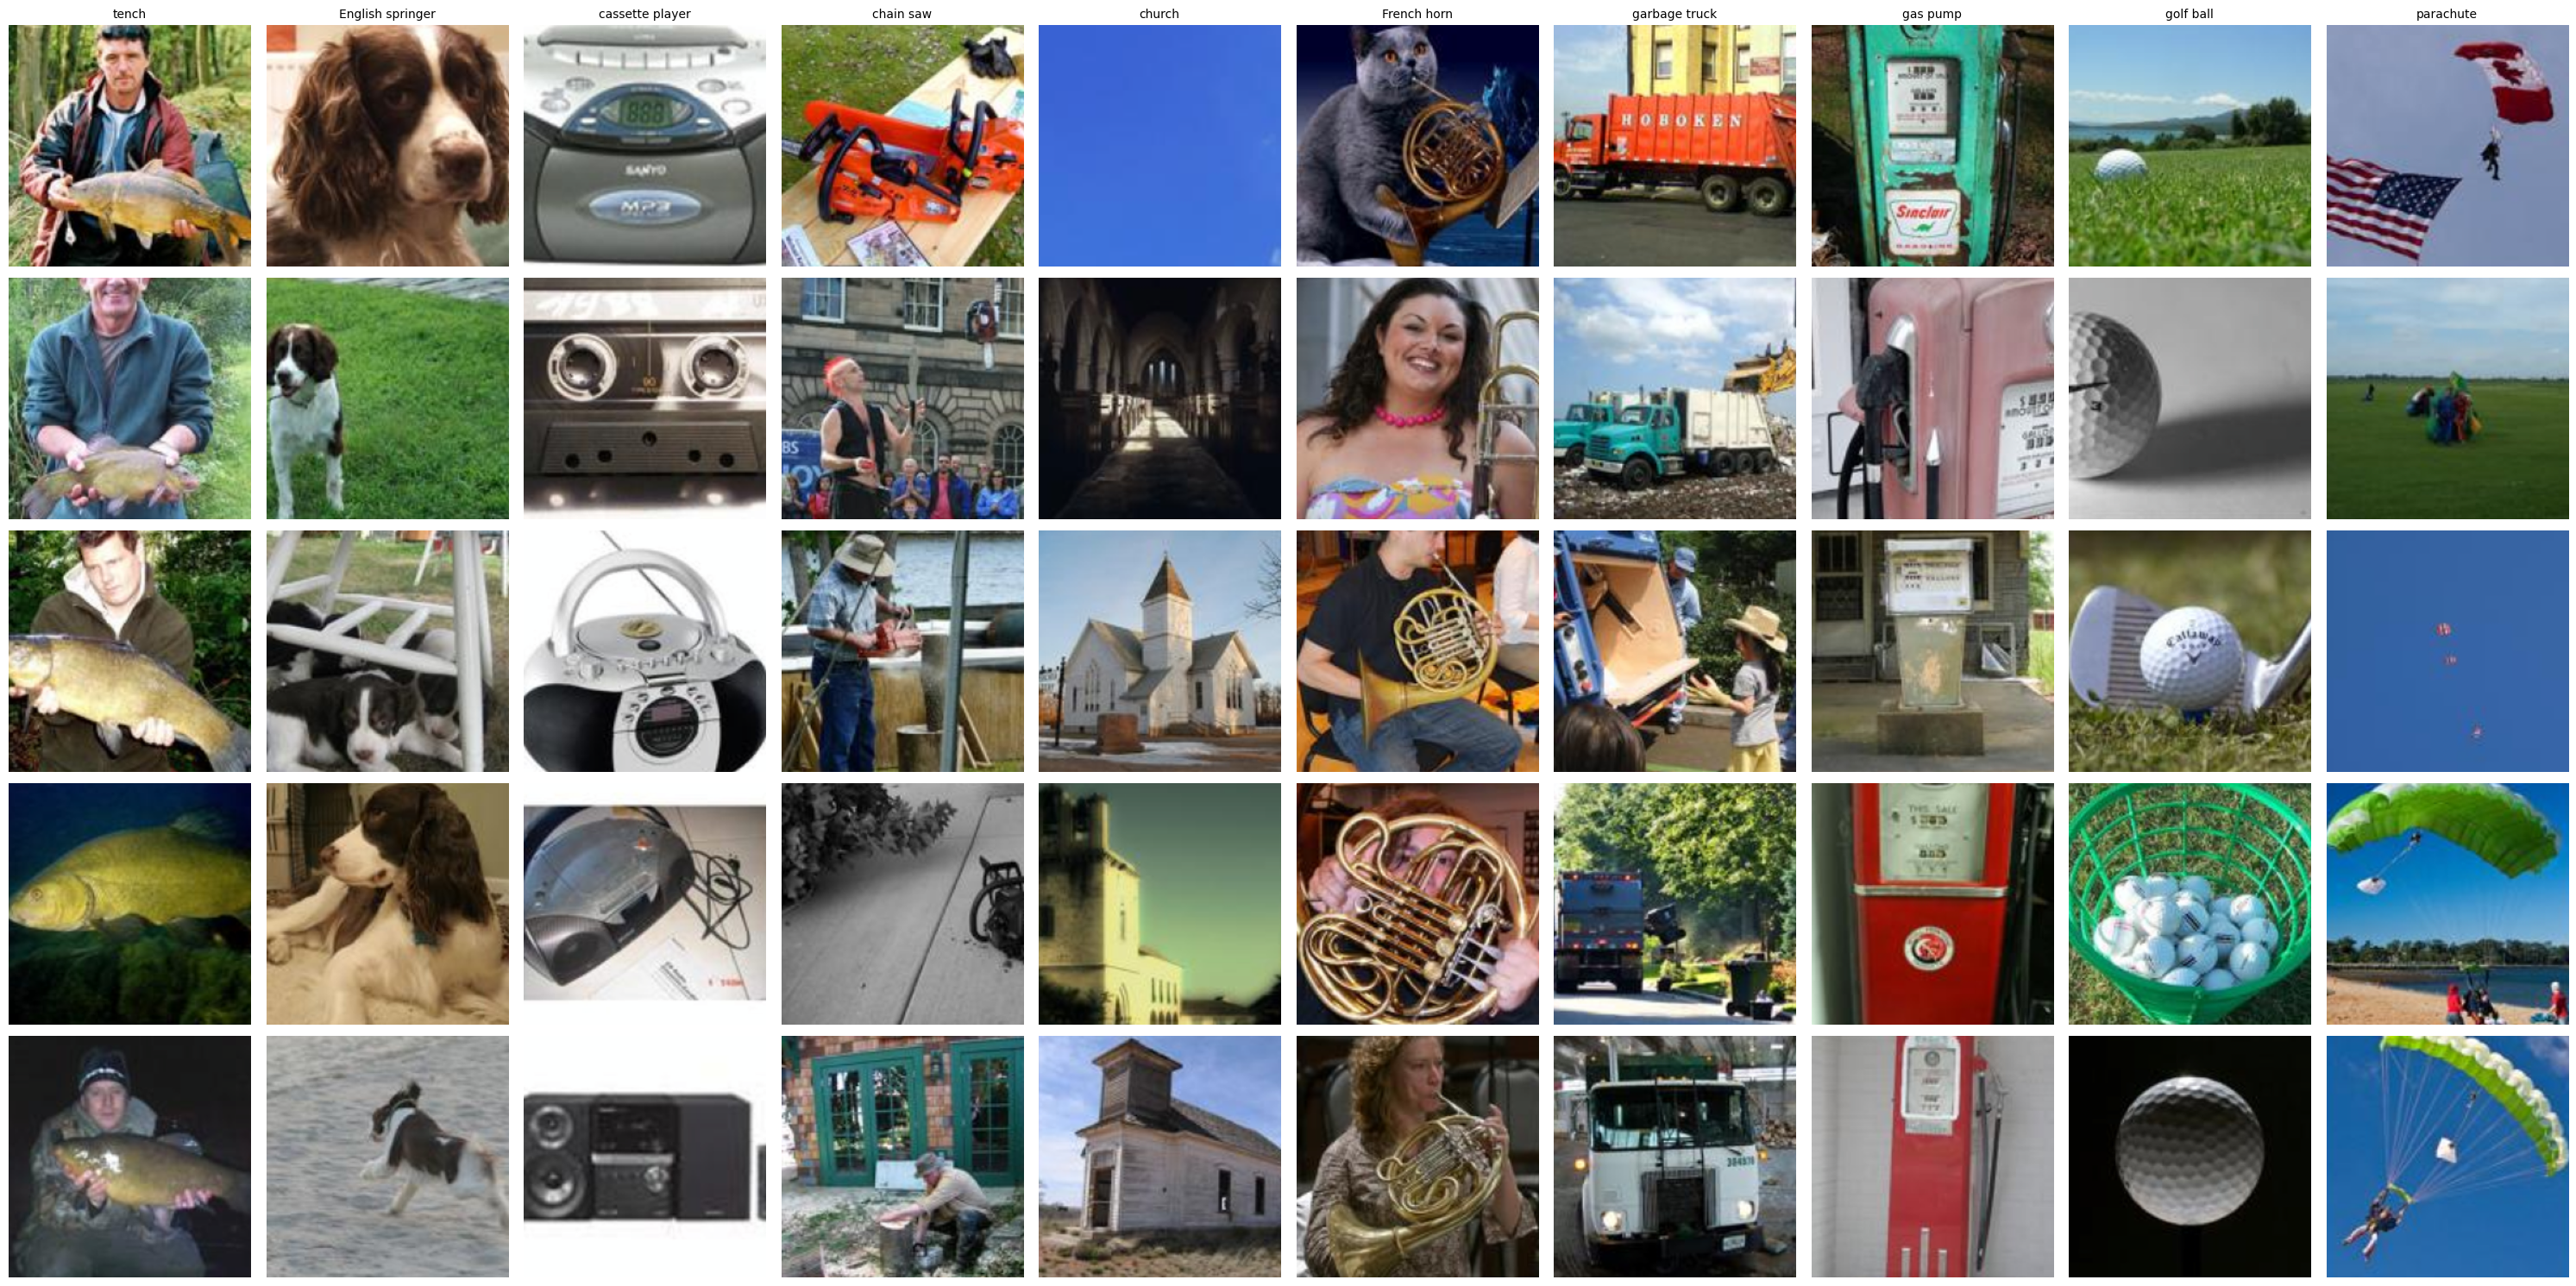

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def imshow(img, title=None):
    img = img.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    plt.axis('off')
    if title:
        plt.title(title, fontsize=10)


class_indices = {i: [] for i in range(len(class_names))}
for idx, (_, label) in enumerate(train_dataset):
    class_indices[label].append(idx)

num_samples = 5
num_classes = len(class_names)

plt.figure(figsize=(num_classes * 3, num_samples * 3))

for class_idx, class_name in enumerate(class_names):
    indices = np.random.choice(class_indices[class_idx], num_samples, replace=False)

    for i, idx in enumerate(indices):
        plt.subplot(num_samples, num_classes, i * num_classes + class_idx + 1)
        img, _ = train_dataset[idx]

        if i == 0:
            imshow(img, title=class_name[0])
        else:
            imshow(img)

plt.tight_layout()
plt.show()


# EX2 - Pretrained models (20pts)

1. Choose 2 models from ```torchvision.models``` ([link](https://pytorch.org/vision/stable/models.html)) that were pretrained on ImageNet. The third model is one of ResNet18/34/50 (the other models can't other ResNet variation).
2. Use ```torch-summary``` to summarize each model for an input of shape ```1x3x224x224```.
3. Describe each model in 2-4 lines. Think carefully what information might be relevant for this homework assignment (see EX3-EX4). It is recommended to read the paper in which each model was first presented but it is not required. You are, however, required to go over model's description in torchvision documentation (see the information tab for ResNet18 for an example [link](https://pytorch.org/vision/0.19/models/generated/torchvision.models.resnet18.html#torchvision.models.resnet18) )
4. Summarize the similarities and difference between the 3 models.

In [18]:
!pip install torch-summary
import torch
import torchvision
from torchvision import models
from torchsummary import summary

In [19]:
# load models (set to evaluation mode to disable dropout)
vgg16 = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1).eval()
densenet121 = models.densenet121(weights=models.DenseNet121_Weights.IMAGENET1K_V1).eval()
resnet50 = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1).eval()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:08<00:00, 65.0MB/s]
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 43.9MB/s]
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 101MB/s] 


In [21]:
print("VGG16 Summary:")
summary(vgg16, (3, 224, 224), device="cpu")

print("\nDenseNet121 Summary:")
summary(densenet121, (3, 224, 224), device="cpu")

print("\nResNet50 Summary:")
summary(resnet50, (3, 224, 224), device="cpu")

VGG16 Summary:
Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 7, 7]           --
|    └─Conv2d: 2-1                       [-1, 64, 224, 224]        1,792
|    └─ReLU: 2-2                         [-1, 64, 224, 224]        --
|    └─Conv2d: 2-3                       [-1, 64, 224, 224]        36,928
|    └─ReLU: 2-4                         [-1, 64, 224, 224]        --
|    └─MaxPool2d: 2-5                    [-1, 64, 112, 112]        --
|    └─Conv2d: 2-6                       [-1, 128, 112, 112]       73,856
|    └─ReLU: 2-7                         [-1, 128, 112, 112]       --
|    └─Conv2d: 2-8                       [-1, 128, 112, 112]       147,584
|    └─ReLU: 2-9                         [-1, 128, 112, 112]       --
|    └─MaxPool2d: 2-10                   [-1, 128, 56, 56]         --
|    └─Conv2d: 2-11                      [-1, 256, 56, 56]         295,168
|    └─ReLU: 2-12                        [-1, 256

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 112, 112]        9,408
├─BatchNorm2d: 1-2                       [-1, 64, 112, 112]        128
├─ReLU: 1-3                              [-1, 64, 112, 112]        --
├─MaxPool2d: 1-4                         [-1, 64, 56, 56]          --
├─Sequential: 1-5                        [-1, 256, 56, 56]         --
|    └─Bottleneck: 2-1                   [-1, 256, 56, 56]         --
|    |    └─Conv2d: 3-1                  [-1, 64, 56, 56]          4,096
|    |    └─BatchNorm2d: 3-2             [-1, 64, 56, 56]          128
|    |    └─ReLU: 3-3                    [-1, 64, 56, 56]          --
|    |    └─Conv2d: 3-4                  [-1, 64, 56, 56]          36,864
|    |    └─BatchNorm2d: 3-5             [-1, 64, 56, 56]          128
|    |    └─ReLU: 3-6                    [-1, 64, 56, 56]          --
|    |    └─Conv2d: 3-7                  [-1, 256, 56, 56]         16,38

# **Model Descriptions**

**VGG16**

Key Feature: Uses small 3×3 kernels repeatedly to increase depth.

Relevance: Simple architecture, large parameter count (138M), final conv output shape: 512×7×7. Feature Map Size - 512 (relevant for ex3 pca)

**DenseNet121**

Key Feature: Feature reuse through concatenation, bottleneck layers reduce parameters (7M).

Relevance: Final conv output shape: 1024×7×7. Feature Map Size - 1024 (relevant for ex3 pca)

**ResNet50**

Key Feature: Solves vanishing gradients via residual blocks, moderate parameters (25M).

Relevance:

Feature Map Size - 2048 (relevant for ex3 pca)

ResNet50’s larger embedding size may capture more nuanced features for KNN in EX4.



# **similarities and difference between the 3 models**

ResNet50 uses residual skip connections to enable deep training (50 layers), balancing moderate parameters (25M) and rich feature maps (2048×7×7). VGG16 relies on stacked 3x3 convolutions, producing simpler but larger features (512×7×7) with high parameters (138M), while DenseNet121 maximizes parameter efficiency (7M) via dense blocks, yielding intermediate features (1024×7×7).

# EX3 - Visualizing feature maps (30pts)
In this section you will visualize the feature maps learned by your chosen models.


*   In a convoultion-based models (i.e., ResNet, ConvNext), use the final conv block. If the image resolution is too small do to maxpooling operations, you may choose a different block.
*   In a vision transformer (ViT), use model output without the cls token (if relevant).

Assignments:


1.   Describe the feature map shape for an input image of shape ```1x3x224x224``` (i.e., ```1x512xHxW``` for some model).
2. Choose 1 class from Imagenette and sample 10 random images.
3. Extract the feature maps from each model and perform PCA on the channel dim from 512 to 3. The output should be of size ```10x3xHxW```
4. Resize the features to 112x112 and plot the images for each model (3 row x 10 columns)
5. Summarize the similarities and difference between the 3 models according to the PCA for the features you have presented.





In [14]:
# selected "tench" (class 0) and sample 10 images
class_idx = 0
class_indices = [i for i, (_, label) in enumerate(train_dataset) if label == class_idx]
selected_indices = np.random.choice(class_indices, 10, replace=False)
images = [train_dataset[i][0].unsqueeze(0) for i in selected_indices]  # Shape: [1, 3, 224, 224]

In [20]:
# ResNet50 (output: 2048x7x7)
resnet50 = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1).eval()
resnet_fe = torch.nn.Sequential(*list(resnet50.children())[:-2])

# VGG16 (output: 512x7x7)
vgg16 = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1).eval()
vgg_fe = vgg16.features

# DenseNet121 (output: 1024x7x7)
densenet121 = models.densenet121(weights=models.DenseNet121_Weights.IMAGENET1K_V1).eval()
densenet_fe = densenet121.features

In [21]:
from sklearn.decomposition import PCA

def apply_pca(feature_map):
    C, H, W = feature_map.shape
    X = feature_map.reshape(C, -1).T
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)
    return X_pca.T.reshape(3, H, W)

def process_image(image, model):
    with torch.no_grad():
        features = model(image).squeeze(0)
    features_np = features.cpu().numpy()
    return apply_pca(features_np)

resnet_pcas = [process_image(img, resnet_fe) for img in images]
vgg_pcas = [process_image(img, vgg_fe) for img in images]
densenet_pcas = [process_image(img, densenet_fe) for img in images]

In [22]:
from torchvision.transforms.functional import resize

def resize_pca(pca_output):
    tensor = torch.from_numpy(pca_output).float()
    return resize(tensor.unsqueeze(0), (112, 112)).squeeze(0)

resnet_resized = [resize_pca(pca) for pca in resnet_pcas]
vgg_resized = [resize_pca(pca) for pca in vgg_pcas]
densenet_resized = [resize_pca(pca) for pca in densenet_pcas]

def normalize(channel):
    return (channel - channel.min()) / (channel.max() - channel.min() + 1e-8)

resnet_normalized = [torch.stack([normalize(c) for c in img]) for img in resnet_resized]
vgg_normalized = [torch.stack([normalize(c) for c in img]) for img in vgg_resized]
densenet_normalized = [torch.stack([normalize(c) for c in img]) for img in densenet_resized]

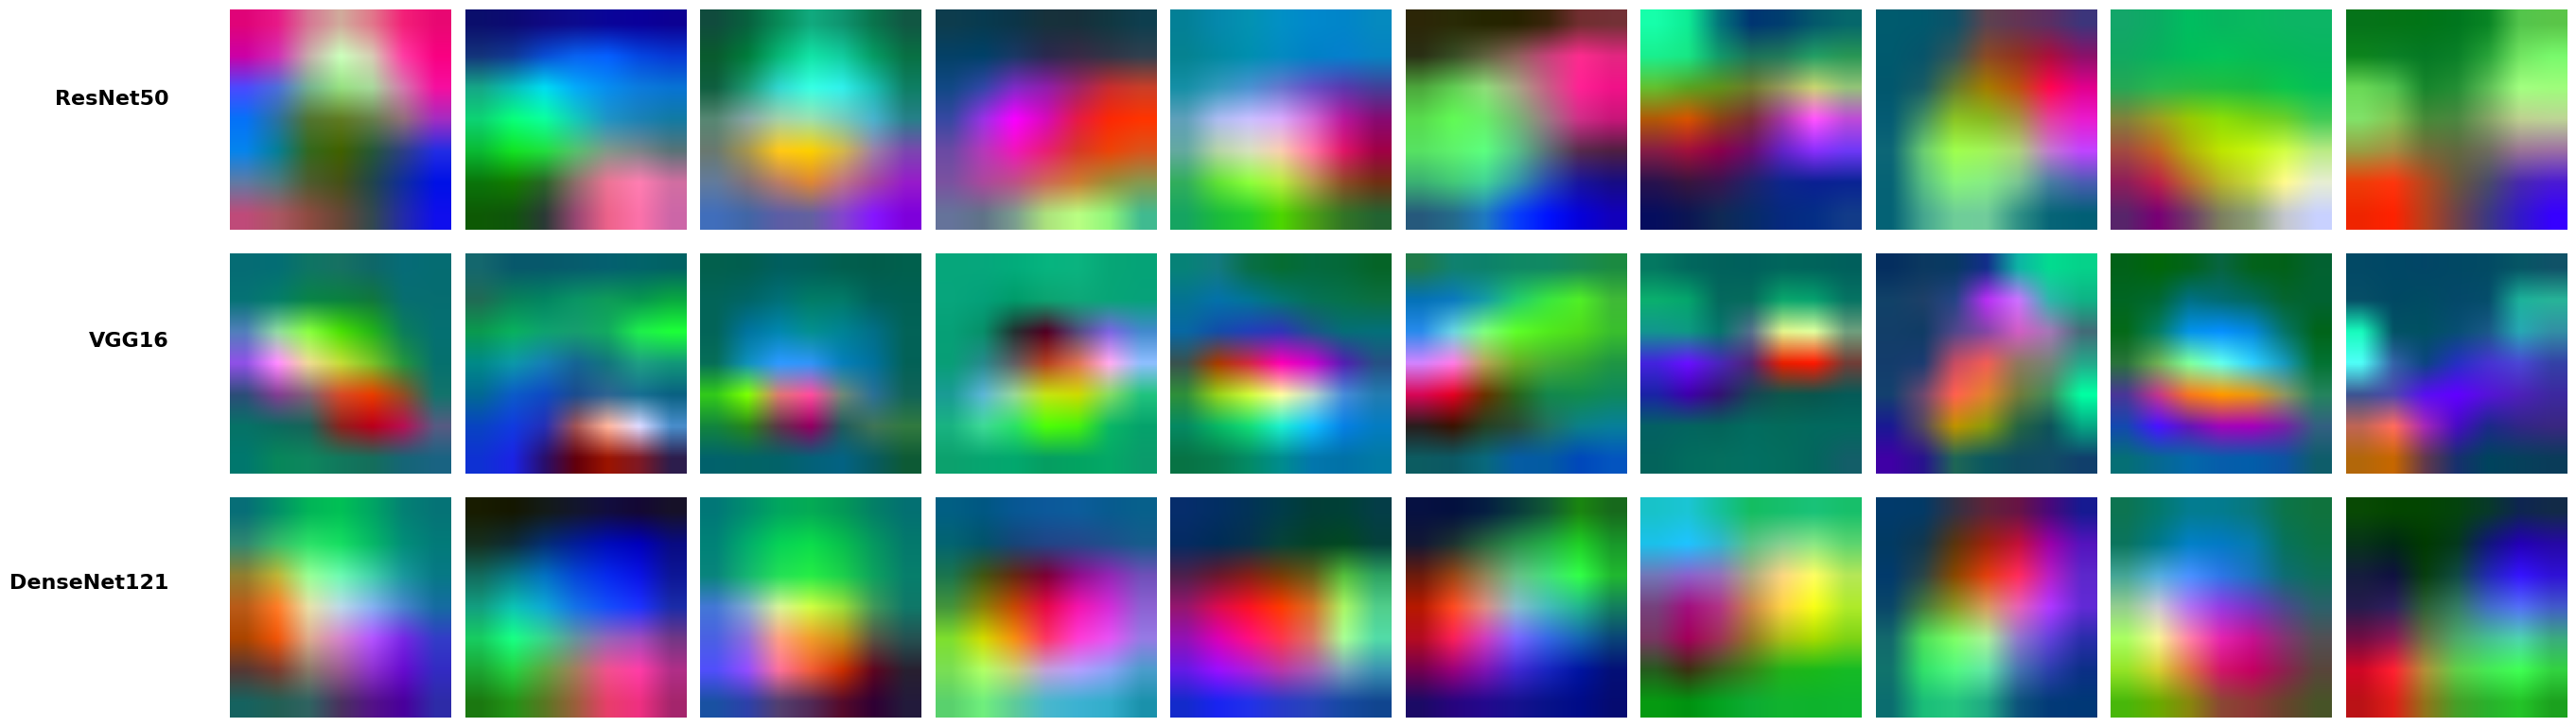

In [31]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 10, figsize=(25, 8))


model_names = ["ResNet50", "VGG16", "DenseNet121"]


for row, (model_data, model_name) in enumerate(zip(
    [resnet_normalized, vgg_normalized, densenet_normalized], model_names)):

    for col, img in enumerate(model_data):
        axes[row, col].imshow(img.permute(1, 2, 0))
        axes[row, col].axis("off")

for i, model_name in enumerate(model_names):
    fig.text(
        -0.02,
        0.85 - i * 0.32,
        model_name,
        fontsize=16,
        fontweight="bold",
        ha="right",
        va="center"
    )


plt.subplots_adjust(left=0.1)
plt.tight_layout()
plt.show()


# **Similarities:**

All models highlight key object regions (e.g., fish body in "tench") through PCA-reduced features. High-activation areas correspond to edges and textures.

# **Differences:**

ResNet50: Captures finer spatial details due to deeper layers and residual connections.

VGG16: Emphasizes broader textures (less granular) due to stacked 3x3 convolutions.

DenseNet121: Shows blended features from dense connections, balancing local and global patterns.



# EX4 - K-Nearest Neighbors (KNN) in the Embedding Space (50pts)
Also know ans "few-shot/ Zero-shot learning".
Perform KNN classification using the feature vectors from each of the 3 models between the train and test set of Imagenette.


## Visualizing the embedding layer distribution.
* Write an ```extract_embedding(dataloader, model, model_name)``` function that takes in a dataloader and a model and return the ```N x Num_features``` matrix for that set. Make sure that shuffle is off.
* You may write different condition for different models. I.e., the embedding in a ViT model is the ```CLS``` token.

* Plot the t-SNE of the train set for each of the 3 models. Color label the points according to the class labels (see t-SNE implementation by sklearn).

* Write a 2-3 lines disscussion about the data distribution of each model and their comparison.


## Build a KNN ```class``` with the following methods:


*   ```init()```: takes the num_classes and other useful information.
* ```extract_embedding(X, model)```: Extracts the embedding vector for the entire train set using the model. X_features should be ```Nxnum_ft```. Call the function from the previous section.

*   ```fit(X_train, model)```: Extracts the embedding vector for the entire train set using the ```extract_embedding()``` method and stores it as ```self.X_train_ft``` and ```self.y_labels``` (the labels from the train set).  


*   ```predict(X_test, model, n_neighbors)```: Extracts the embedding vector for the entire train set using the ```extract_embedding()``` method and performs KNN for a given K. Returns the predicted_labels.
* ```compute_accuracy(y_true, y_pred)```.


## Compare the KNN accuracy
using each of the 3 models for $K\in[1,3,5 ]$ and report the results in a table or a graph. Summarize the results in 2-4 lines.


In [1]:
device='cuda'

In [2]:
def extract_embedding(dataloader, model):
    model.eval()
    embeddings, labels = [], []
    with torch.no_grad():
        for images, targets in dataloader:
            images = images.to(device)
            features = model(images).cpu()
            embeddings.append(features)
            labels.append(targets)
    return torch.cat(embeddings).numpy(), torch.cat(labels).numpy()

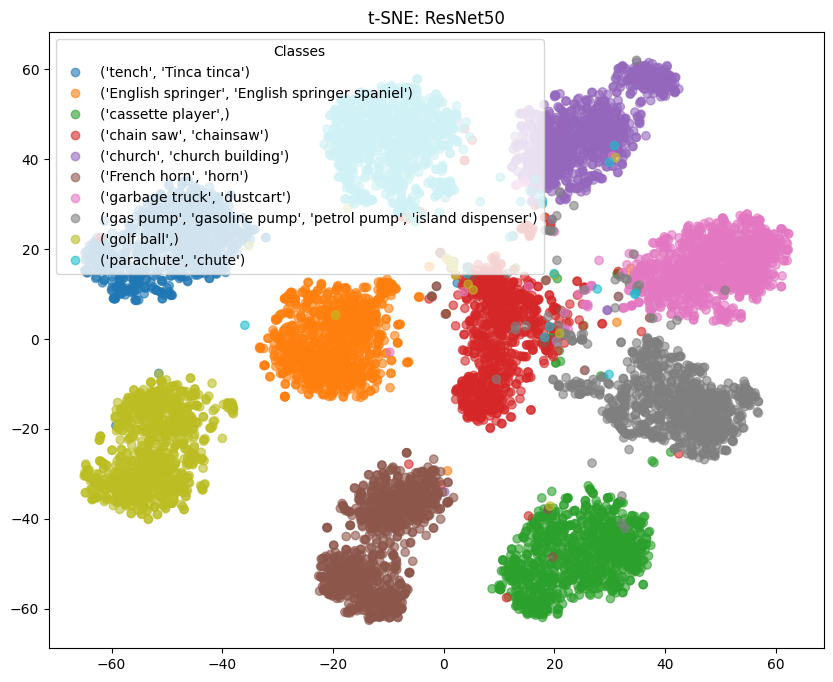

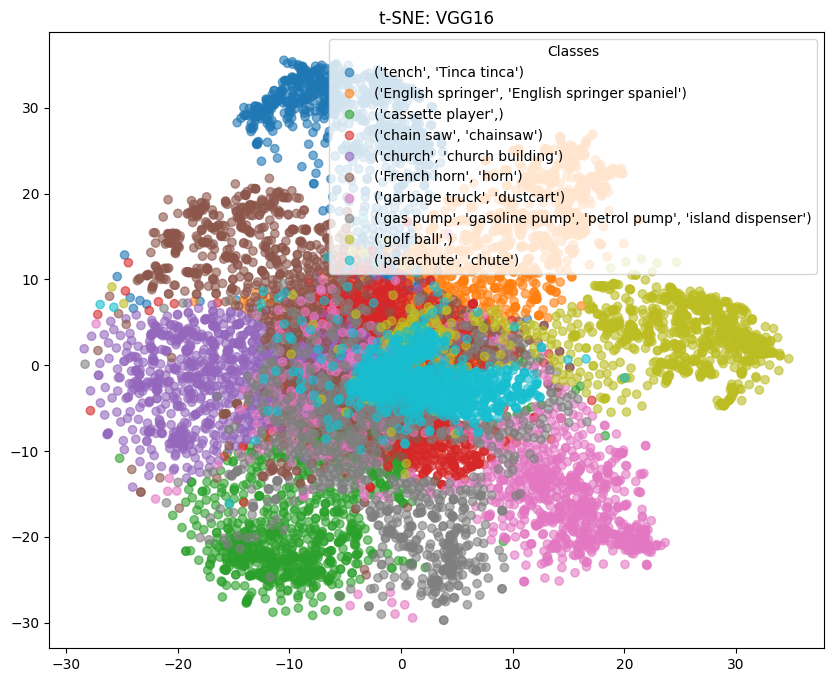

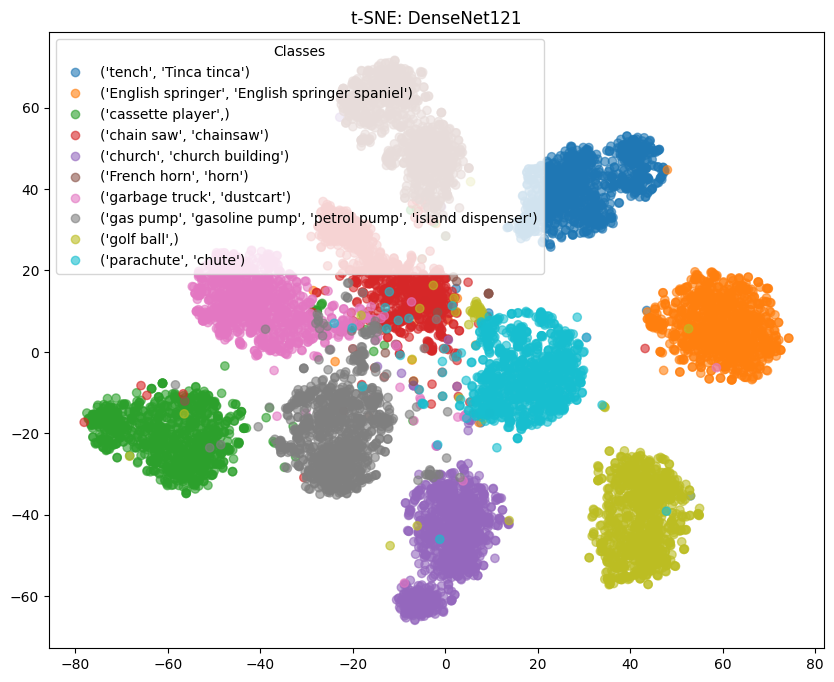

In [12]:
from sklearn.manifold import TSNE
import torch.nn as nn

def plot_tsne(embeddings, labels, class_names, title):
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d = tsne.fit_transform(embeddings)
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(embeddings_2d[:,0], embeddings_2d[:,1], c=labels, cmap='tab10', alpha=0.6)
    plt.legend(handles=scatter.legend_elements()[0], labels=class_names, title="Classes")
    plt.title(title)
    plt.show()

# Create embedding models
resnet_embedding = torch.nn.Sequential(*list(resnet50.children())[:-1], nn.Flatten()).eval().to(device)
vgg_embedding = torch.nn.Sequential(vgg16.features, vgg16.avgpool, nn.Flatten()).eval().to(device)
densenet_embedding = torch.nn.Sequential(densenet121.features, nn.ReLU(), nn.AdaptiveAvgPool2d(1), nn.Flatten()).eval().to(device)

models = {
    'ResNet50': resnet_embedding,
    'VGG16': vgg_embedding,
    'DenseNet121': densenet_embedding
}

# Plot t-SNE for each model
for name, model in models.items():
    train_embeddings, train_labels = extract_embedding(train_loader, model)
    plot_tsne(train_embeddings, train_labels, class_names, f't-SNE: {name}')

In [13]:
class KNN:
    def __init__(self):
        self.X_train = None
        self.y_train = None

    def fit(self, X_train_emb, y_train_labels):
        self.X_train = X_train_emb
        self.y_train = y_train_labels

    def predict(self, X_test_emb, k=1):
        X_test = torch.from_numpy(X_test_emb).to(device)
        X_train = torch.from_numpy(self.X_train).to(device)
        distances = torch.cdist(X_test, X_train)
        _, indices = torch.topk(distances, k=k, largest=False)
        neighbor_labels = self.y_train[indices.cpu().numpy()]
        preds = np.array([np.bincount(labels).argmax() for labels in neighbor_labels])
        return preds

    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)

In [14]:
results = []
for model_name, model in models.items():
    # extract embeddings
    X_train, y_train = extract_embedding(train_loader, model)
    X_val, y_val = extract_embedding(val_loader, model)

    # train KNN
    knn = KNN()
    knn.fit(X_train, y_train)

    # evaluate
    for k in [1, 3, 5]:
        y_pred = knn.predict(X_val, k=k)
        acc = knn.accuracy(y_val, y_pred)
        results.append({'Model': model_name, 'K': k, 'Accuracy': acc})
        print(f"{model_name} (K={k}): Accuracy = {acc:.3f}")

ResNet50 (K=1): Accuracy = 0.975
ResNet50 (K=3): Accuracy = 0.978
ResNet50 (K=5): Accuracy = 0.979
VGG16 (K=1): Accuracy = 0.550
VGG16 (K=3): Accuracy = 0.503
VGG16 (K=5): Accuracy = 0.483
DenseNet121 (K=1): Accuracy = 0.965
DenseNet121 (K=3): Accuracy = 0.971
DenseNet121 (K=5): Accuracy = 0.975


In [15]:
import pandas as pd
df_results = pd.DataFrame(results)
print(df_results.pivot(index='Model', columns='K', values='Accuracy'))


K                   1         3         5
Model                                    
DenseNet121  0.965096  0.971465  0.974522
ResNet50     0.974522  0.977834  0.979108
VGG16        0.550064  0.502930  0.482548


# **Discussion:**
 - ResNet50 achieves the highest accuracy due to deeper architecture and residual connections.
 - Larger K (for example - K=5) sometimes improves accuracy by smoothing noise.
 - VGG16 performs worst, propably due to simpler architecture.